In [1]:
from dask.distributed import Client

client = Client("tcp://10.32.0.14:43415")
client

Client Scheduler: tcp://10.32.0.14:43415 Dashboard: /user/0000-0002-8176-9465/proxy/8787/status,Cluster Workers: 25 Cores: 50 Memory: 287.50 GB


# Poster Figs nb for SOSE

## 1. First create datasets for WG variable

In [2]:
import xarray as xr
from matplotlib import pyplot as plt
import gcsfs
import dask
import dask.array as dsa
import numpy as np
import intake
import fsspec
import xmitgcm
from xhistogram.xarray import histogram
from xmitgcm.llcreader.llcmodel import faces_dataset_to_latlon
%matplotlib inline

/srv/conda/envs/notebook/lib/python3.7/site-packages/intake/source/discovery.py:136: FutureWarning: The drivers ['geojson', 'postgis', 'shapefile', 'spatialite'] do not specify entry_points and were only discovered via a package scan. This may break in a future release of intake. The packages should be updated.
  FutureWarning)


In [3]:
lower_lat = 0
upper_lat = 78
left_lon = 1788
right_lon = 2159
XG_right = 2160
YG_upper = 79

In [4]:
#set the boundaries
lat_range = dict(YC=slice(lower_lat, upper_lat), YG=slice(lower_lat, YG_upper))
lon_range = dict(XC=slice(left_lon, right_lon), XG=slice(left_lon, XG_right))

In [5]:
#set the boundaries
lat_range_noface = dict(YC=slice(lower_lat, upper_lat))
lon_range_noface = dict(XC=slice(left_lon, right_lon))

In [6]:
ds = xr.open_zarr(gcsfs.GCSFileSystem(requester_pays=True).get_mapper('pangeo-ecco-sose'), consolidated=True)

In [7]:
coords = ds.coords.to_dataset().reset_coords()
dsr = ds.reset_coords(drop=True)
dsr

<xarray.Dataset>
Dimensions:   (XC: 2160, XG: 2160, YC: 320, YG: 320, Z: 42, Zl: 42, Zp1: 43, Zu: 42, time: 438)
Coordinates:
  * XC        (XC) float32 0.083333336 0.25 0.4166667 ... 359.75 359.9167
  * XG        (XG) float32 5.551115e-17 0.16666667 ... 359.6667 359.83334
  * YC        (YC) float32 -77.87497 -77.7083 -77.54163 ... -24.874966 -24.7083
  * YG        (YG) float32 -77.9583 -77.79163 -77.62497 ... -24.9583 -24.791632
  * Z         (Z) float32 -5.0 -15.5 -27.0 -39.5 ... -5075.0 -5325.0 -5575.0
  * Zl        (Zl) float32 0.0 -10.0 -21.0 -33.0 ... -4950.0 -5200.0 -5450.0
  * Zp1       (Zp1) float32 0.0 -10.0 -21.0 -33.0 ... -5200.0 -5450.0 -5700.0
  * Zu        (Zu) float32 -10.0 -21.0 -33.0 -46.0 ... -5200.0 -5450.0 -5700.0
  * time      (time) datetime64[ns] 2005-01-06 2005-01-11 ... 2010-12-31
Data variables:
    ADVr_SLT  (time, Zl, YC, XC) float32 dask.array<chunksize=(1, 42, 320, 2160), meta=np.ndarray>
    ADVr_TH   (time, Zl, YC, XC) float32 dask.array<chunksize=(1, 42, 320, 2160), meta=np.ndarray>
    ADVx_SLT  (time, Z, YC, XG) float32 dask.array<chunksize=(1, 42, 320, 2160), meta=np.ndarray>
    ADVx_TH   (time, Z, YC, XG) float32 dask.array<chunksize=(1, 42, 320, 2160), meta=np.ndarray>
    ADVy_SLT  (time, Z, YG, XC) float32 dask.array<chunksize=(1, 42, 320, 2160), meta=np.ndarray>
    ADVy_TH   (time, Z, YG, XC) float32 dask.array<chunksize=(1, 42, 320, 2160), meta=np.ndarray>
    DFrE_SLT  (time, Zl, YC, XC) float32 dask.array<chunksize=(1, 42, 320, 2160), meta=np.ndarray>
    DFrE_TH   (time, Zl, YC, XC) float32 dask.array<chunksize=(1, 42, 320, 2160), meta=np.ndarray>
    DFrI_SLT  (time, Zl, YC, XC) float32 dask.array<chunksize=(1, 42, 320, 2160), meta=np.ndarray>
    DFrI_TH   (time, Zl, YC, XC) float32 dask.array<chunksize=(1, 42, 320, 2160), meta=np.ndarray>
    DFxE_SLT  (time, Z, YC, XG) float32 dask.array<chunksize=(1, 42, 320, 2160), meta=np.ndarray>
    DFxE_TH   (time, Z, YC, XG) float32 dask.array<chunksize=(1, 42, 320, 2160), meta=np.ndarray>
    DFyE_SLT  (time, Z, YG, XC) float32 dask.array<chunksize=(1, 42, 320, 2160), meta=np.ndarray>
    DFyE_TH   (time, Z, YG, XC) float32 dask.array<chunksize=(1, 42, 320, 2160), meta=np.ndarray>
    DRHODR    (time, Zl, YC, XC) float32 dask.array<chunksize=(1, 42, 320, 2160), meta=np.ndarray>
    ETAN      (time, YC, XC) float32 dask.array<chunksize=(1, 320, 2160), meta=np.ndarray>
    EXFswnet  (time, YC, XC) float32 dask.array<chunksize=(1, 320, 2160), meta=np.ndarray>
    KPPg_SLT  (time, Zl, YC, XC) float32 dask.array<chunksize=(1, 42, 320, 2160), meta=np.ndarray>
    KPPg_TH   (time, Zl, YC, XC) float32 dask.array<chunksize=(1, 42, 320, 2160), meta=np.ndarray>
    PHIHYD    (time, Z, YC, XC) float32 dask.array<chunksize=(1, 42, 320, 2160), meta=np.ndarray>
    SALT      (time, Z, YC, XC) float32 dask.array<chunksize=(1, 42, 320, 2160), meta=np.ndarray>
    SFLUX     (time, YC, XC) float32 dask.array<chunksize=(1, 320, 2160), meta=np.ndarray>
    SIarea    (time, YC, XC) float32 dask.array<chunksize=(1, 320, 2160), meta=np.ndarray>
    SIatmFW   (time, YC, XC) float32 dask.array<chunksize=(1, 320, 2160), meta=np.ndarray>
    SIatmQnt  (time, YC, XC) float32 dask.array<chunksize=(1, 320, 2160), meta=np.ndarray>
    SIdHbATC  (time, YC, XC) float32 dask.array<chunksize=(1, 320, 2160), meta=np.ndarray>
    SIdHbATO  (time, YC, XC) float32 dask.array<chunksize=(1, 320, 2160), meta=np.ndarray>
    SIdHbOCN  (time, YC, XC) float32 dask.array<chunksize=(1, 320, 2160), meta=np.ndarray>
    SIdSbATC  (time, YC, XC) float32 dask.array<chunksize=(1, 320, 2160), meta=np.ndarray>
    SIdSbOCN  (time, YC, XC) float32 dask.array<chunksize=(1, 320, 2160), meta=np.ndarray>
    SIempmr   (time, YC, XC) float32 dask.array<chunksize=(1, 320, 2160), meta=np.ndarray>
    SIfu      (time, YC, XG) float32 dask.array<chunksize=(1, 320, 2160), meta=np.ndarray>
    SIfv      (time, YG, XC) float32 dask.array<chunksize=(1, 320, 2160), meta=np.ndarray>
    SIheff    (time, 

In [8]:
ds_wg = dsr.isel(**lat_range, **lon_range)
coords_wg = coords.isel(**lat_range, **lon_range)

In [9]:
ds_tmp = xr.open_zarr(gcsfs.GCSMap('pangeo-tmp/stb2145/SOSE/budget_th.zarr'))
ds_slt = xr.open_zarr(gcsfs.GCSMap('pangeo-tmp/stb2145/SOSE/budget_slt.zarr'))

In [10]:
ds_tmp_wg = ds_tmp.isel(**lat_range_noface, **lon_range_noface)
ds_slt_wg = ds_slt.isel(**lat_range_noface, **lon_range_noface)

In [11]:
ds_tns_wg = xr.merge([ds_wg.THETA.rename('THETA'),
                   ds_wg.SALT.rename('SALT'),
                   ds_wg.ETAN.rename('ETAN')])
ds_tns_wg

<xarray.Dataset>
Dimensions:  (XC: 371, YC: 78, Z: 42, time: 438)
Coordinates:
  * XC       (XC) float32 298.08334 298.25 298.4167 ... 359.58334 359.75
  * YC       (YC) float32 -77.87497 -77.7083 -77.54163 ... -65.2083 -65.04163
  * Z        (Z) float32 -5.0 -15.5 -27.0 -39.5 ... -5075.0 -5325.0 -5575.0
  * time     (time) datetime64[ns] 2005-01-06 2005-01-11 ... 2010-12-31
Data variables:
    THETA    (time, Z, YC, XC) float32 dask.array<chunksize=(1, 42, 78, 371), meta=np.ndarray>
    SALT     (time, Z, YC, XC) float32 dask.array<chunksize=(1, 42, 78, 371), meta=np.ndarray>
    ETAN     (time, YC, XC) float32 dask.array<chunksize=(1, 78, 371), meta=np.ndarray>

In [12]:
ds_vel = xr.merge([ds_wg.UVEL.rename('UVEL'),
                   ds_wg.VVEL.rename('VVEL'),
                   ds_wg.WVEL.rename('WVEL'),
                   ds_wg.WTHMASS.rename('WTHMASS'),
                   ds_wg.WSLTMASS.rename('WSLTMASS'),
                   ds_wg.surForcS.rename('surForcS'),
                   ds_wg.surForcT.rename('surForcT')])
ds_vel

<xarray.Dataset>
Dimensions:   (XC: 371, XG: 372, YC: 78, YG: 79, Z: 42, Zl: 42, time: 438)
Coordinates:
  * XG        (XG) float32 298.0 298.1667 298.33334 ... 359.5 359.6667 359.83334
  * YC        (YC) float32 -77.87497 -77.7083 -77.54163 ... -65.2083 -65.04163
  * Z         (Z) float32 -5.0 -15.5 -27.0 -39.5 ... -5075.0 -5325.0 -5575.0
  * time      (time) datetime64[ns] 2005-01-06 2005-01-11 ... 2010-12-31
  * XC        (XC) float32 298.08334 298.25 298.4167 ... 359.58334 359.75
  * YG        (YG) float32 -77.9583 -77.79163 -77.62497 ... -65.12497 -64.9583
  * Zl        (Zl) float32 0.0 -10.0 -21.0 -33.0 ... -4950.0 -5200.0 -5450.0
Data variables:
    UVEL      (time, Z, YC, XG) float32 dask.array<chunksize=(1, 42, 78, 372), meta=np.ndarray>
    VVEL      (time, Z, YG, XC) float32 dask.array<chunksize=(1, 42, 79, 371), meta=np.ndarray>
    WVEL      (time, Zl, YC, XC) float32 dask.array<chunksize=(1, 42, 78, 371), meta=np.ndarray>
    WTHMASS   (time, Zl, YC, XC) float32 dask.array<chunksize=(1, 42, 78, 371), meta=np.ndarray>
    WSLTMASS  (time, Zl, YC, XC) float32 dask.array<chunksize=(1, 42, 78, 371), meta=np.ndarray>
    surForcS  (time, YC, XC) float32 dask.array<chunksize=(1, 78, 371), meta=np.ndarray>
    surForcT  (time, YC, XC) float32 dask.array<chunksize=(1, 78, 371), meta=np.ndarray>

In [ ]:
ds_tns_wg.nbytes/1e9 #GB

In [ ]:
ds_slt_wg.nbytes/1e9 #GB

In [ ]:
ds_tmp_wg.nbytes/1e9 #GB

In [ ]:
coords_wg.nbytes/1e9 #GB

In [ ]:
ds_vel.nbytes/1e9 #GB

### 1a. Load to netcdf

## 2. POSTER SECTION

In [13]:
ds = xr.merge([ds_tns_wg, ds_tmp_wg, ds_vel])
ds

<xarray.Dataset>
Dimensions:                  (XC: 371, XG: 372, YC: 78, YG: 79, Z: 42, Zl: 42, time: 438)
Coordinates:
  * XC                       (XC) float32 298.08334 298.25 ... 359.58334 359.75
  * YC                       (YC) float32 -77.87497 -77.7083 ... -65.04163
  * Z                        (Z) float32 -5.0 -15.5 -27.0 ... -5325.0 -5575.0
  * time                     (time) datetime64[ns] 2005-01-06 ... 2010-12-31
  * XG                       (XG) float32 298.0 298.1667 ... 359.6667 359.83334
  * YG                       (YG) float32 -77.9583 -77.79163 ... -64.9583
  * Zl                       (Zl) float32 0.0 -10.0 -21.0 ... -5200.0 -5450.0
Data variables:
    THETA                    (time, Z, YC, XC) float32 dask.array<chunksize=(1, 42, 78, 371), meta=np.ndarray>
    SALT                     (time, Z, YC, XC) float32 dask.array<chunksize=(1, 42, 78, 371), meta=np.ndarray>
    ETAN                     (time, YC, XC) float32 dask.array<chunksize=(1, 78, 371), meta=np.ndarray>
    conv_horiz_adv_flux_TH   (time, Z, YC, XC) float32 dask.array<chunksize=(1, 42, 78, 371), meta=np.ndarray>
    conv_horiz_diff_flux_TH  (time, Z, YC, XC) float32 dask.array<chunksize=(1, 42, 78, 371), meta=np.ndarray>
    conv_vert_adv_flux_TH    (time, Z, YC, XC) float32 dask.array<chunksize=(1, 42, 78, 371), meta=np.ndarray>
    conv_vert_diff_flux_TH   (time, Z, YC, XC) float32 dask.array<chunksize=(1, 42, 78, 371), meta=np.ndarray>
    lin_fs_correction_TH     (time, YC, XC) float32 dask.array<chunksize=(1, 78, 371), meta=np.ndarray>
    surface_flux_conv_TH     (time, YC, XC) float32 dask.array<chunksize=(1, 78, 371), meta=np.ndarray>
    sw_flux_conv_TH          (time, YC, XC, Z) float32 dask.array<chunksize=(1, 78, 371, 42), meta=np.ndarray>
    total_tendency_TH_truth  (time, Z, YC, XC) float64 dask.array<chunksize=(1, 42, 78, 371), meta=np.ndarray>
    UVEL                     (time, Z, YC, XG) float32 dask.array<chunksize=(1, 42, 78, 372), meta=np.ndarray>
    VVEL                     (time, Z, YG, XC) float32 dask.array<chunksize=(1, 42, 79, 371), meta=np.ndarray>
    WVEL                     (time, Zl, YC, XC) float32 dask.array<chunksize=(1, 42, 78, 371), meta=np.ndarray>
    WTHMASS                  (time, Zl, YC, XC) float32 dask.array<chunksize=(1, 42, 78, 371), meta=np.ndarray>
    WSLTMASS                 (time, Zl, YC, XC) float32 dask.array<chunksize=(1, 42, 78, 371), meta=np.ndarray>
    surForcS                 (time, YC, XC) float32 dask.array<chunksize=(1, 78, 371), meta=np.ndarray>
    surForcT                 (time, YC, XC) float32 dask.array<chunksize=(1, 78, 371), meta=np.ndarray>

In [14]:
coords_no_polynya = coords_wg.isel(time=slice(72,  -1))
ds_no_polynya = ds.isel(time=slice(72,  -1))

In [15]:
ds_no_polynya

<xarray.Dataset>
Dimensions:                  (XC: 371, XG: 372, YC: 78, YG: 79, Z: 42, Zl: 42, time: 365)
Coordinates:
  * XC                       (XC) float32 298.08334 298.25 ... 359.58334 359.75
  * YC                       (YC) float32 -77.87497 -77.7083 ... -65.04163
  * Z                        (Z) float32 -5.0 -15.5 -27.0 ... -5325.0 -5575.0
  * time                     (time) datetime64[ns] 2006-01-01 ... 2010-12-26
  * XG                       (XG) float32 298.0 298.1667 ... 359.6667 359.83334
  * YG                       (YG) float32 -77.9583 -77.79163 ... -64.9583
  * Zl                       (Zl) float32 0.0 -10.0 -21.0 ... -5200.0 -5450.0
Data variables:
    THETA                    (time, Z, YC, XC) float32 dask.array<chunksize=(1, 42, 78, 371), meta=np.ndarray>
    SALT                     (time, Z, YC, XC) float32 dask.array<chunksize=(1, 42, 78, 371), meta=np.ndarray>
    ETAN                     (time, YC, XC) float32 dask.array<chunksize=(1, 78, 371), meta=np.ndarray>
    conv_horiz_adv_flux_TH   (time, Z, YC, XC) float32 dask.array<chunksize=(1, 42, 78, 371), meta=np.ndarray>
    conv_horiz_diff_flux_TH  (time, Z, YC, XC) float32 dask.array<chunksize=(1, 42, 78, 371), meta=np.ndarray>
    conv_vert_adv_flux_TH    (time, Z, YC, XC) float32 dask.array<chunksize=(1, 42, 78, 371), meta=np.ndarray>
    conv_vert_diff_flux_TH   (time, Z, YC, XC) float32 dask.array<chunksize=(1, 42, 78, 371), meta=np.ndarray>
    lin_fs_correction_TH     (time, YC, XC) float32 dask.array<chunksize=(1, 78, 371), meta=np.ndarray>
    surface_flux_conv_TH     (time, YC, XC) float32 dask.array<chunksize=(1, 78, 371), meta=np.ndarray>
    sw_flux_conv_TH          (time, YC, XC, Z) float32 dask.array<chunksize=(1, 78, 371, 42), meta=np.ndarray>
    total_tendency_TH_truth  (time, Z, YC, XC) float64 dask.array<chunksize=(1, 42, 78, 371), meta=np.ndarray>
    UVEL                     (time, Z, YC, XG) float32 dask.array<chunksize=(1, 42, 78, 372), meta=np.ndarray>
    VVEL                     (time, Z, YG, XC) float32 dask.array<chunksize=(1, 42, 79, 371), meta=np.ndarray>
    WVEL                     (time, Zl, YC, XC) float32 dask.array<chunksize=(1, 42, 78, 371), meta=np.ndarray>
    WTHMASS                  (time, Zl, YC, XC) float32 dask.array<chunksize=(1, 42, 78, 371), meta=np.ndarray>
    WSLTMASS                 (time, Zl, YC, XC) float32 dask.array<chunksize=(1, 42, 78, 371), meta=np.ndarray>
    surForcS                 (time, YC, XC) float32 dask.array<chunksize=(1, 78, 371), meta=np.ndarray>
    surForcT                 (time, YC, XC) float32 dask.array<chunksize=(1, 78, 371), meta=np.ndarray>

In [16]:
ds = ds.chunk({'time':5})
ds.nbytes/1e9

30.097776624

Text(0.5, 1.0, 'full time ds')

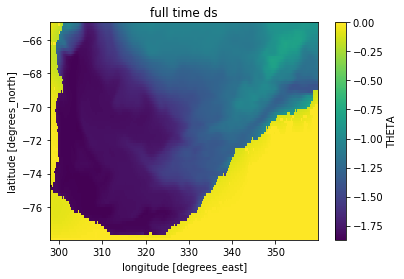

In [17]:
ds.THETA.isel(Z=0).mean(dim='time').plot()
plt.title('full time ds')

Text(0.5, 1.0, 'no polynya ds')

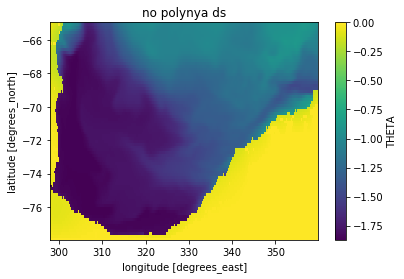

In [18]:
ds_no_polynya.THETA.isel(Z=0).mean(dim='time').plot()
plt.title('no polynya ds')

In [ ]:
terms = ['conv_horiz_adv_flux_TH', 'conv_horiz_diff_flux_TH',
         'conv_vert_adv_flux_TH', 'conv_vert_diff_flux_TH',
         'sw_flux_conv_TH', 'surface_flux_conv_TH']

In [ ]:
total = sum(ds[term] for term in terms)

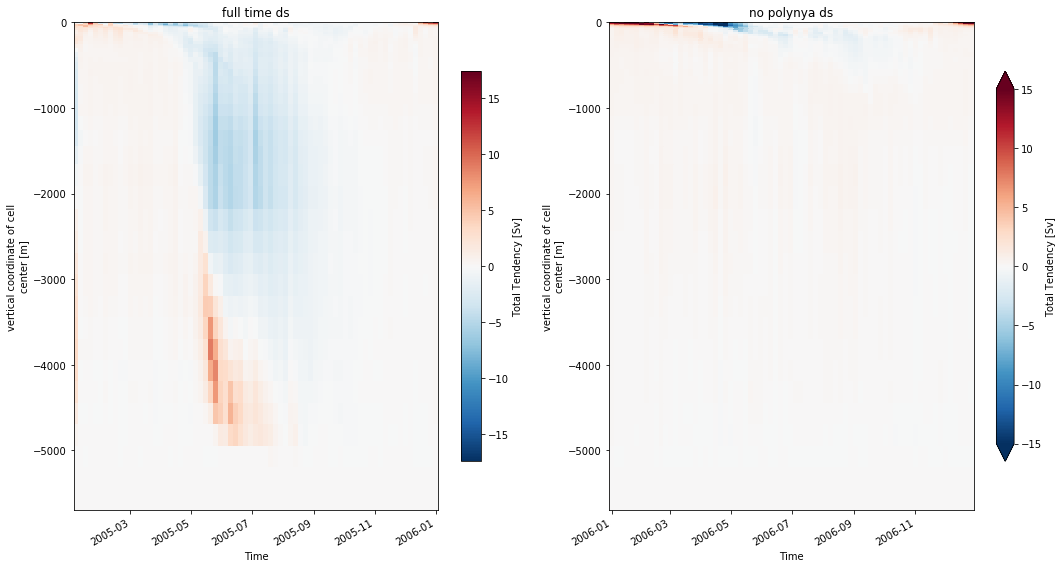

In [26]:
fig, (ax0,ax1) = plt.subplots(1, 2, figsize=(15,8))
(ds/1e6).total_tendency_TH_truth.isel(time=slice(0,73)).sum(dim=['XC', 'YC']).plot(y='Z', ax=ax0, 
                                              cbar_kwargs={'shrink':0.8, 'label':'Total Tendency [Sv]'})
ax0.set_title('full time ds')

(ds_no_polynya/1e6).total_tendency_TH_truth.isel(time=slice(0,73)).sum(dim=['XC', 'YC']).plot(y='Z', ax=ax1,
                                                         cbar_kwargs={'shrink':0.8, 'label':'Total Tendency [Sv]'},
                                                                                             vmax=15)
ax1.set_title('no polynya ds')

plt.tight_layout();

# dV/dt == OMEGA(total_tendency_TH_truth) + R1

In [16]:
# define bins
delta_theta = 0.1
theta_bins = np.arange(-2.2, 2.2, delta_theta)

vol = (coords_no_polynya.drF * coords_no_polynya.rA * coords_no_polynya.hFacC)

In [88]:
ds_no_polynya['theta'] = ds_no_polynya.THETA.rename('theta')

In [91]:
ds_no_polynya = ds_no_polynya.drop('THETA')

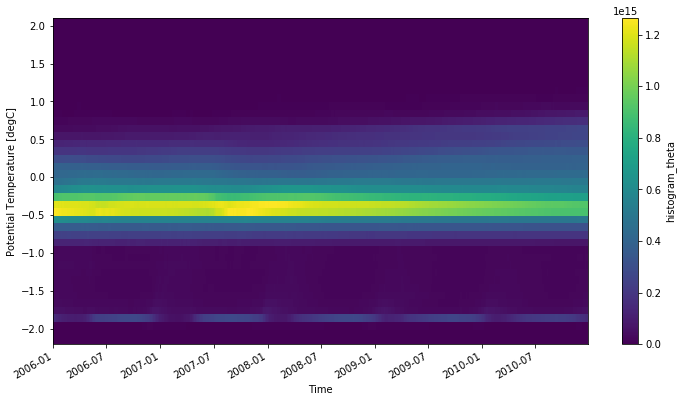

In [90]:
# theta distribution in WG region
theta_dist = histogram(ds_no_polynya.theta.rename('theta'), bins=[theta_bins],
                       weights=vol, dim=['XC', 'YC', 'Z']).load()
theta_dist.plot(x='time', figsize=(12, 6))

### **COMPARE TO WOA (OBSERVATIONS)**
select out the polynya - start 2006

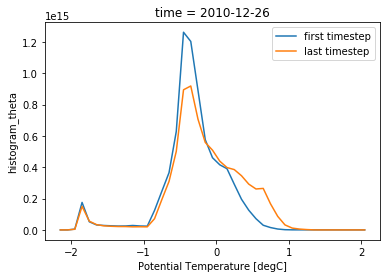

In [18]:
theta_dist[0].plot(label='first timestep')
theta_dist[-1].plot(label='last timestep')
plt.legend();

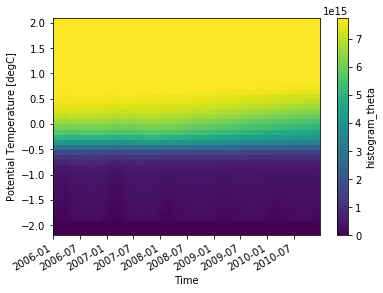

In [19]:
# cumulative volume
V = theta_dist.cumsum(dim='theta_bin')
V.transpose().plot()

In [20]:
V

<xarray.DataArray 'histogram_theta' (time: 365, theta_bin: 43)>
array([[1.64149678e+10, 7.64688381e+10, 5.17888633e+12, ...,
        7.75161958e+15, 7.75181445e+15, 7.75197156e+15],
       [1.64149678e+10, 6.65869181e+10, 5.01905670e+12, ...,
        7.74895695e+15, 7.74924094e+15, 7.74953489e+15],
       [1.04360059e+10, 5.71426711e+10, 4.92564136e+12, ...,
        7.74615428e+15, 7.74648640e+15, 7.74685547e+15],
       ...,
       [0.00000000e+00, 5.16127075e+10, 4.70644815e+12, ...,
        7.75287193e+15, 7.75291025e+15, 7.75292312e+15],
       [3.79599795e+09, 4.85041111e+10, 4.45328123e+12, ...,
        7.75268436e+15, 7.75272610e+15, 7.75277995e+15],
       [5.56746368e+09, 5.38720018e+10, 4.23801809e+12, ...,
        7.75264894e+15, 7.75266137e+15, 7.75267985e+15]])
Coordinates:
  * time       (time) datetime64[ns] 2006-01-01 2006-01-06 ... 2010-12-26
  * theta_bin  (theta_bin) float64 -2.15 -2.05 -1.95 -1.85 ... 1.85 1.95 2.05

In [21]:
V_mean = V.mean(dim='time')
V_anom = V - V_mean

## $\frac{\partial \mathcal{V}}{\partial t}$

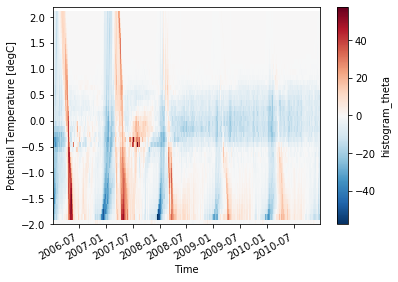

In [22]:
dt = 5*24*60*60
#using V_anom bc there is no change in V_mean
dVdt = V_anom.diff(dim='time') / dt
(dVdt/1e6).plot(x='time')#, vmax=200e6)
plt.ylim(ymin=-2, ymax=2.2);

## $\Omega_{total}$

In [93]:
omega_total = -histogram(ds_no_polynya.theta.rename('theta'), bins=[theta_bins],
                         weights=ds_no_polynya.total_tendency_TH_truth,
                         dim=['XC', 'YC', 'Z']) / delta_theta

In [153]:
omega_total = omega_total[1:].load()

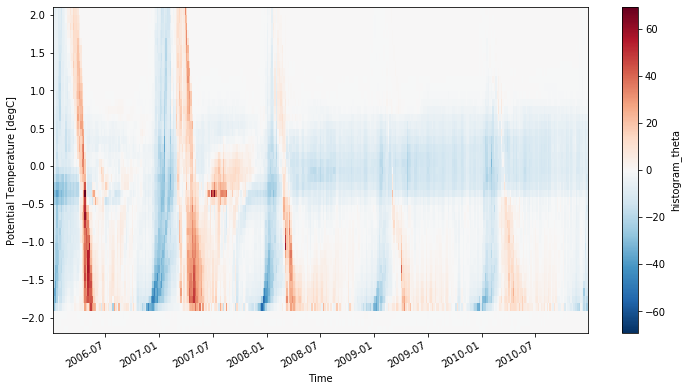

In [154]:
(omega_total/1e6).plot(x='time', figsize=(12, 6))#, vmax=5e7)

## R1 = $\frac{\partial \mathcal{V}}{\partial t} - \Omega_{total}$ (Discretization of theta layers)

In [147]:
dVdt.time

<xarray.DataArray 'time' (time: 364)>
array(['2006-01-06T00:00:00.000000000', '2006-01-11T00:00:00.000000000',
       '2006-01-16T00:00:00.000000000', ..., '2010-12-16T00:00:00.000000000',
       '2010-12-21T00:00:00.000000000', '2010-12-26T00:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 2006-01-06 2006-01-11 ... 2010-12-26
Attributes:
    axis:           T
    long_name:      Time
    standard_name:  time

In [155]:
omega_total.time

<xarray.DataArray 'time' (time: 364)>
array(['2006-01-06T00:00:00.000000000', '2006-01-11T00:00:00.000000000',
       '2006-01-16T00:00:00.000000000', ..., '2010-12-16T00:00:00.000000000',
       '2010-12-21T00:00:00.000000000', '2010-12-26T00:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 2006-01-06 2006-01-11 ... 2010-12-26
Attributes:
    axis:           T
    long_name:      Time
    standard_name:  time

In [156]:
R1 = dVdt - omega_total
R1.load()

<xarray.DataArray 'histogram_theta' (time: 364, theta_bin: 43)>
array([[   -3086.71990741,   -26008.25799334,  -380456.45757557, ...,
          192696.36491782, -1018117.8628588 ,  -201941.39714786],
       [  -13895.13876157,   -13114.95715278,  -173860.10537248, ...,
        -1630668.53183536, -1316065.52392824,  -626067.60621825],
       [   18212.61396296,   -20288.15933927,  -501432.77412769, ...,
        -1650008.78844426,  -679266.39300109,  1017722.25330746],
       ...,
       [       0.        ,     2374.47596072,  -502070.464921  , ...,
         -347613.32518519,  -173237.89007407,  -465620.26835185],
       [    8203.75200116,    -6421.19849096,  -565078.53090271, ...,
          -93121.14716667,   -18186.76031481,   163547.02366667],
       [    4091.02148409,    10763.15215909,  -428487.45788959, ...,
         -114638.76692593,  -165709.20380093,  -279021.27524074]])
Coordinates:
  * time       (time) datetime64[ns] 2006-01-06 2006-01-11 ... 2010-12-26
  * theta_bin  (theta_bin) float64 -2.15 -2.05 -1.95 -1.85 ... 1.85 1.95 2.05

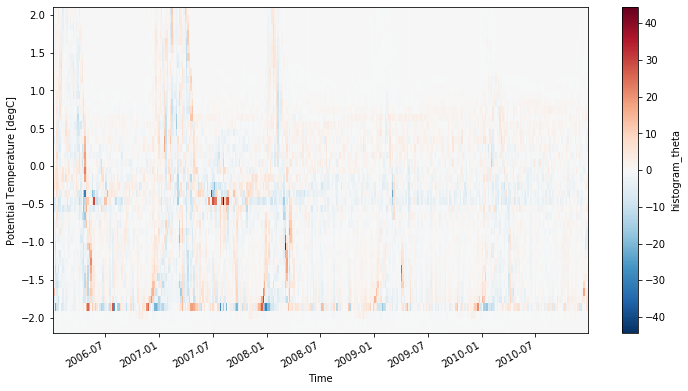

In [157]:
(R1/1e6).plot(x='time', figsize=(12, 6))#, vmax=5e7)

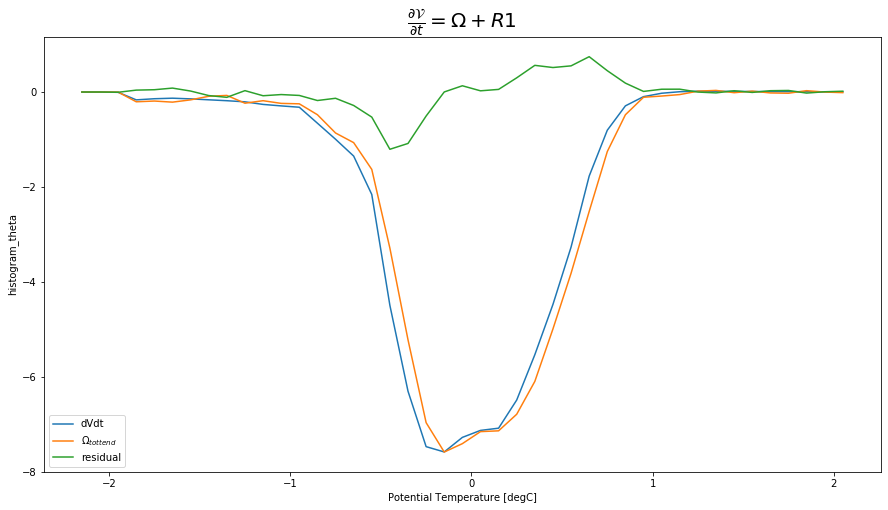

In [158]:
plt.figure(figsize=(15,8))
(dVdt/1e6).mean(dim='time').plot(label='dVdt')
(omega_total/1e6).mean(dim='time').plot(label=r'$\Omega_{tottend}$')
(R1/1e6).mean(dim='time').plot(label='residual')
plt.legend()
plt.title(r'$\frac{\partial \mathcal{V}}{\partial t} = \Omega + R1$', fontsize=20);

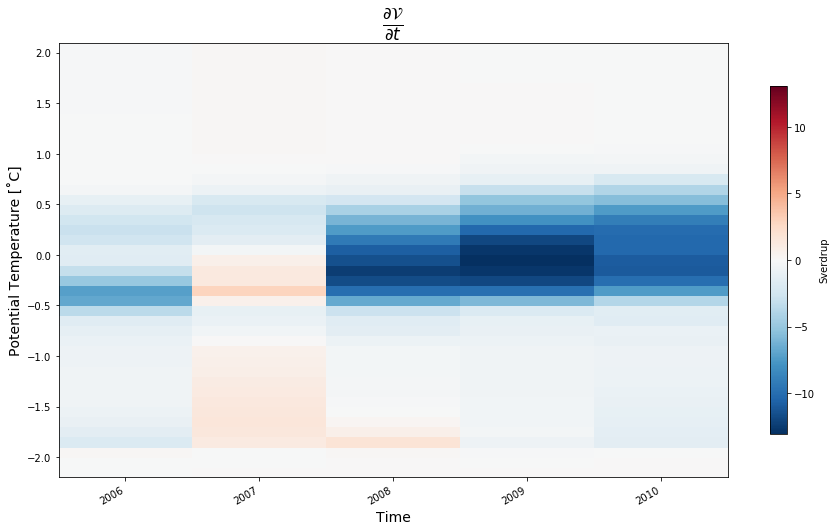

In [31]:
(dVdt/1e6).resample(time='AS').mean(dim='time').plot(x='time', figsize=(15,8), cbar_kwargs={'shrink': 0.8, 'label':'Sverdrup'})
plt.ylabel('Potential Temperature [˚C]', fontsize=14)
plt.xlabel('Time', fontsize=14)
plt.title(r'$\frac{\partial \mathcal{V}}{\partial t}$', fontsize=24);
#plt.clabel('Sverdrup [$10^{6} \frac{m^3}{s}$] ')

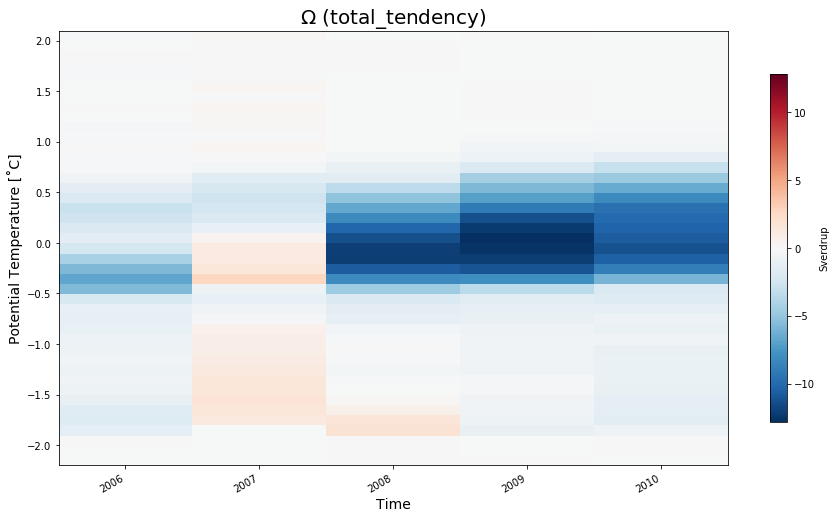

In [159]:
(omega_total/1e6).resample(time='AS').mean(dim='time').plot(x='time', figsize=(15,8), cbar_kwargs={'shrink': 0.8, 'label':'Sverdrup'})
plt.ylabel('Potential Temperature [˚C]', fontsize=14)
plt.xlabel('Time', fontsize=14)
plt.title('$\Omega$ (total_tendency)', fontsize=20);
#plt.clabel('Sverdrup [$10^{6} \frac{m^3}{s}$] ')

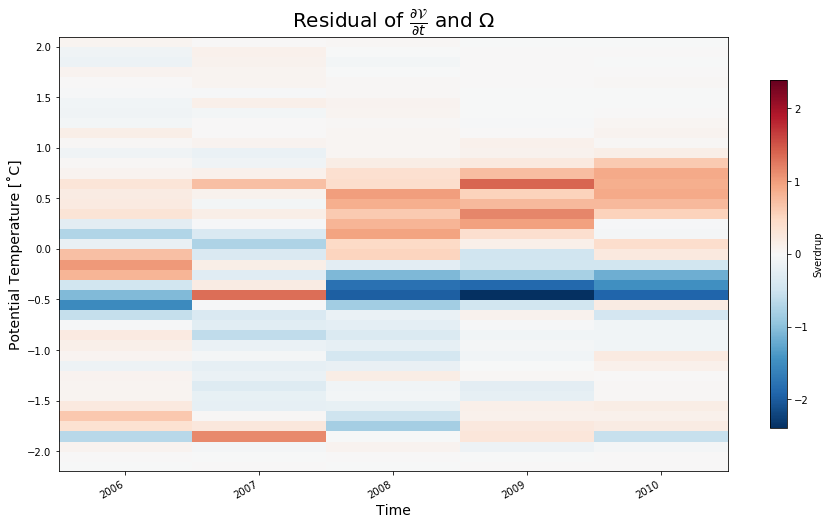

In [160]:
(R1/1e6).resample(time='AS').mean(dim='time').plot(x='time', figsize=(15,8), cbar_kwargs={'shrink': 0.8, 'label':'Sverdrup'})
plt.ylabel('Potential Temperature [˚C]', fontsize=14)
plt.xlabel('Time', fontsize=14)
plt.title(r'Residual of $\frac{\partial \mathcal{V}}{\partial t}$ and $\Omega$', fontsize=20);
#plt.clabel('Sverdrup [$10^{6} \frac{m^3}{s}$] ')

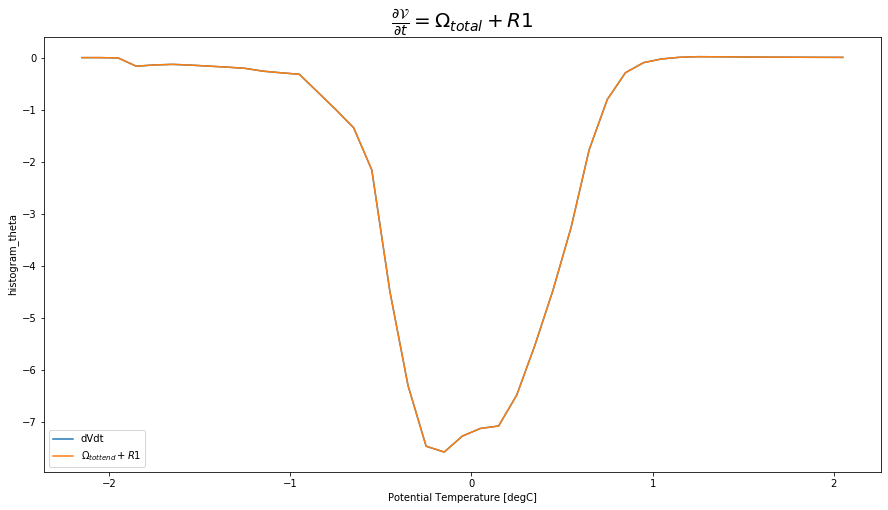

In [161]:
plt.figure(figsize=(15,8))
(dVdt/1e6).mean(dim='time').plot(label='dVdt')
((omega_total + R1)/1e6).mean(dim='time').plot(label=r'$\Omega_{tottend} + R1$')
plt.legend()
plt.title(r'$\frac{\partial \mathcal{V}}{\partial t} = \Omega_{total} + R1$', fontsize=20);

### Calculate Omega ($\Omega$: transformation rate)

In [35]:
ds_tmp_no_polynya = ds_tmp_wg.isel(time=slice(72, -1)).chunk({'XC':-1, 'YC':-1, 'Z':-1, 'time':1})

In [94]:
def histogram_func(variable):
    """Generalized xhistogram's histogram function 
    for adv and diff flux terms"""
    hist = histogram(ds_no_polynya.chunk({'XC':-1, 'YC':-1, 'Z':-1, 'time':1}).theta.rename('theta'), bins=[theta_bins],
              weights=variable, dim=['XC', 'YC', 'Z'])
    return hist / delta_theta

In [95]:
all_tendencies = list(ds_tmp_no_polynya)
all_tendencies

['conv_horiz_adv_flux_TH',
 'conv_horiz_diff_flux_TH',
 'conv_vert_adv_flux_TH',
 'conv_vert_diff_flux_TH',
 'lin_fs_correction_TH',
 'surface_flux_conv_TH',
 'sw_flux_conv_TH',
 'total_tendency_TH_truth']

In [96]:
ds_tmp_no_polynya

<xarray.Dataset>
Dimensions:                  (XC: 371, YC: 78, Z: 42, time: 365)
Coordinates:
  * XC                       (XC) float32 298.08334 298.25 ... 359.58334 359.75
  * YC                       (YC) float32 -77.87497 -77.7083 ... -65.04163
  * Z                        (Z) float32 -5.0 -15.5 -27.0 ... -5325.0 -5575.0
  * time                     (time) datetime64[ns] 2006-01-01 ... 2010-12-26
Data variables:
    conv_horiz_adv_flux_TH   (time, Z, YC, XC) float32 dask.array<chunksize=(1, 42, 78, 371), meta=np.ndarray>
    conv_horiz_diff_flux_TH  (time, Z, YC, XC) float32 dask.array<chunksize=(1, 42, 78, 371), meta=np.ndarray>
    conv_vert_adv_flux_TH    (time, Z, YC, XC) float32 dask.array<chunksize=(1, 42, 78, 371), meta=np.ndarray>
    conv_vert_diff_flux_TH   (time, Z, YC, XC) float32 dask.array<chunksize=(1, 42, 78, 371), meta=np.ndarray>
    lin_fs_correction_TH     (time, YC, XC) float32 dask.array<chunksize=(1, 78, 371), meta=np.ndarray>
    surface_flux_conv_TH     (time, YC, XC) float32 dask.array<chunksize=(1, 78, 371), meta=np.ndarray>
    sw_flux_conv_TH          (time, YC, XC, Z) float32 dask.array<chunksize=(1, 78, 371, 42), meta=np.ndarray>
    total_tendency_TH_truth  (time, Z, YC, XC) float64 dask.array<chunksize=(1, 42, 78, 371), meta=np.ndarray>

In [97]:
all_dsets = xr.merge([histogram_func(ds_tmp_no_polynya[var]).rename('OMEGA_' + var)
                      for var in all_tendencies])
all_dsets

<xarray.Dataset>
Dimensions:                        (theta_bin: 43, time: 365)
Coordinates:
  * time                           (time) datetime64[ns] 2006-01-01 ... 2010-12-26
  * theta_bin                      (theta_bin) float64 -2.15 -2.05 ... 1.95 2.05
Data variables:
    OMEGA_conv_horiz_adv_flux_TH   (time, theta_bin) float64 dask.array<chunksize=(1, 43), meta=np.ndarray>
    OMEGA_conv_horiz_diff_flux_TH  (time, theta_bin) float64 dask.array<chunksize=(1, 43), meta=np.ndarray>
    OMEGA_conv_vert_adv_flux_TH    (time, theta_bin) float64 dask.array<chunksize=(1, 43), meta=np.ndarray>
    OMEGA_conv_vert_diff_flux_TH   (time, theta_bin) float64 dask.array<chunksize=(1, 43), meta=np.ndarray>
    OMEGA_lin_fs_correction_TH     (time, theta_bin) float64 dask.array<chunksize=(1, 43), meta=np.ndarray>
    OMEGA_surface_flux_conv_TH     (time, theta_bin) float64 dask.array<chunksize=(1, 43), meta=np.ndarray>
    OMEGA_sw_flux_conv_TH          (time, theta_bin) float64 dask.array<chunksize=(1, 43), meta=np.ndarray>
    OMEGA_total_tendency_TH_truth  (time, theta_bin) float64 dask.array<chunksize=(1, 43), meta=np.ndarray>

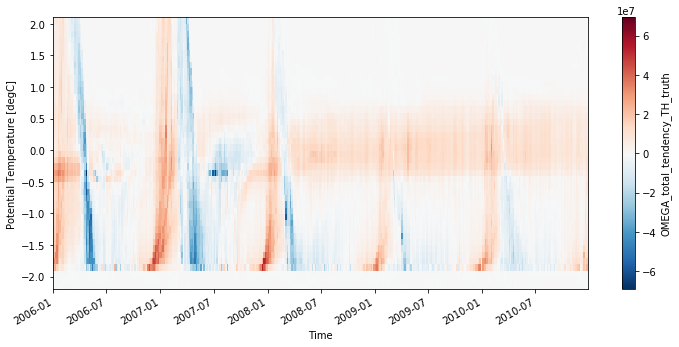

In [40]:
all_dsets.OMEGA_total_tendency_TH_truth.plot(x='time', figsize=(12, 5))

## $\Psi_{adv}$

In [164]:
psi_adv = -(all_dsets.OMEGA_conv_horiz_adv_flux_TH + all_dsets.OMEGA_conv_vert_adv_flux_TH)
psi_adv = psi_adv[1:].load()

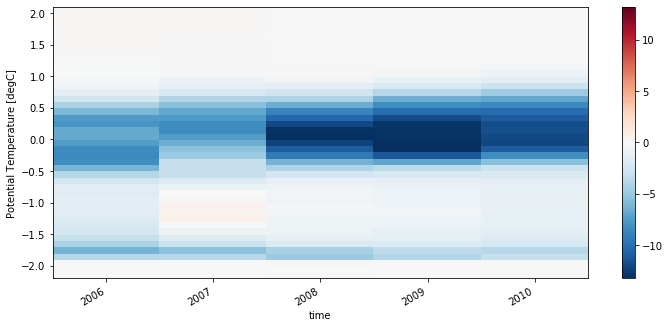

In [42]:
(psi_adv/1e6).resample(time='AS').mean(dim='time').plot(x='time', figsize=(12, 5))

## $\Omega_{trans-rate}$

In [176]:
omega_trans_rate = - (all_dsets.OMEGA_conv_horiz_diff_flux_TH + 
                      all_dsets.OMEGA_conv_vert_diff_flux_TH +
                      all_dsets.OMEGA_sw_flux_conv_TH + 
                      all_dsets.OMEGA_surface_flux_conv_TH +
                      all_dsets.OMEGA_lin_fs_correction_TH)
omega_trans_rate = omega_trans_rate[1:].load()

In [197]:
omega_trans_rate

<xarray.DataArray (time: 364, theta_bin: 43)>
array([[ 1.59397446e+05,  3.37792128e+05,  1.88992367e+07, ...,
        -1.79329417e+06, -2.08880490e+06, -1.04485857e+06],
       [ 9.93450485e+04,  4.12877951e+05,  2.03692500e+07, ...,
         5.79601508e+04, -4.27769449e+05, -4.60328475e+05],
       [ 1.53966765e+05,  3.10726315e+05,  1.76825881e+07, ...,
         3.05000741e+06,  3.80245333e+06,  2.32810077e+06],
       ...,
       [-0.00000000e+00,  2.17942752e+05,  1.17345103e+07, ...,
         3.62933814e+05,  4.45184971e+05, -1.03283463e+04],
       [ 2.57726817e+04,  2.80475685e+05,  1.08343745e+07, ...,
         4.82303763e+05,  6.98662774e+05,  1.08286679e+06],
       [ 3.63300220e+04,  2.40700201e+05,  9.23686178e+06, ...,
        -2.67108900e+04,  5.12206552e+05,  9.09309167e+05]])
Coordinates:
  * time       (time) datetime64[ns] 2006-01-06 2006-01-11 ... 2010-12-26
  * theta_bin  (theta_bin) float64 -2.15 -2.05 -1.95 -1.85 ... 1.85 1.95 2.05

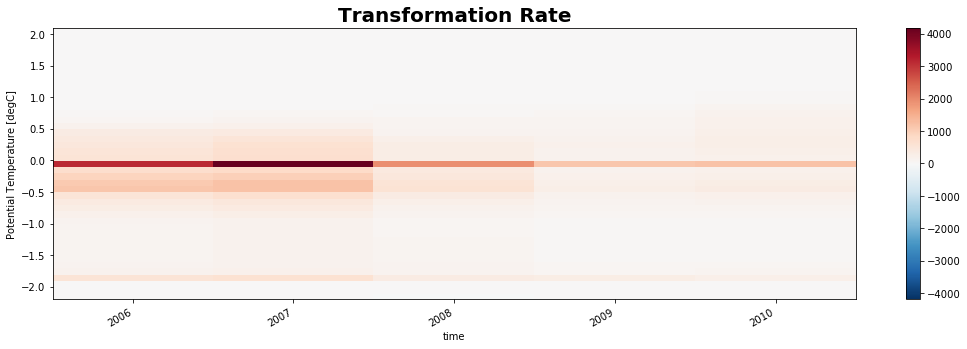

In [101]:
(omega_trans_rate.resample(time='AS').mean()/1e6).plot(x='time', figsize=(18,5))
plt.title('Transformation Rate', fontsize=20, weight='bold');

## $\Psi_{vel}$

In [159]:
ds_no_polynya.WTHMASS

<xarray.DataArray 'WTHMASS' (time: 365, Zl: 42, YC: 78, XC: 371)>
dask.array<getitem, shape=(365, 42, 78, 371), dtype=float32, chunksize=(5, 42, 78, 371), chunktype=numpy.ndarray>
Coordinates:
  * XC       (XC) float32 298.08334 298.25 298.4167 ... 359.58334 359.75
  * YC       (YC) float32 -77.87497 -77.7083 -77.54163 ... -65.2083 -65.04163
  * time     (time) datetime64[ns] 2006-01-01 2006-01-06 ... 2010-12-26
  * Zl       (Zl) float32 0.0 -10.0 -21.0 -33.0 ... -4950.0 -5200.0 -5450.0
Attributes:
    long_name:      Vertical Mass-Weight Transp of Pot Temp (K.m/s)
    standard_name:  WTHMASS
    units:          degC.m/s

In [160]:
ds_no_polynya.UVEL

<xarray.DataArray 'UVEL' (time: 365, Z: 42, YC: 78, XG: 372)>
dask.array<getitem, shape=(365, 42, 78, 372), dtype=float32, chunksize=(5, 42, 78, 372), chunktype=numpy.ndarray>
Coordinates:
  * YC       (YC) float32 -77.87497 -77.7083 -77.54163 ... -65.2083 -65.04163
  * Z        (Z) float32 -5.0 -15.5 -27.0 -39.5 ... -5075.0 -5325.0 -5575.0
  * time     (time) datetime64[ns] 2006-01-01 2006-01-06 ... 2010-12-26
  * XG       (XG) float32 298.0 298.1667 298.33334 ... 359.5 359.6667 359.83334
Attributes:
    long_name:      Zonal Component of Velocity (m/s)
    mate:           VVEL
    standard_name:  UVEL
    units:          m/s

### *Questions:*
1. Do I have to multiply by THETA for U & V, bc when I bin the velocities are the weights...and the bins are theta...so why multiply by theta to vel before making them the weights?
2. Or should I fix ECCO?
3. Should I adjust WTHMASS to from Kelvin to Celsius?

In [164]:
ds_no_polynya.UVEL

<xarray.DataArray 'UVEL' (time: 365, Z: 42, YC: 78, XG: 372)>
dask.array<getitem, shape=(365, 42, 78, 372), dtype=float32, chunksize=(5, 42, 78, 372), chunktype=numpy.ndarray>
Coordinates:
  * YC       (YC) float32 -77.87497 -77.7083 -77.54163 ... -65.2083 -65.04163
  * Z        (Z) float32 -5.0 -15.5 -27.0 -39.5 ... -5075.0 -5325.0 -5575.0
  * time     (time) datetime64[ns] 2006-01-01 2006-01-06 ... 2010-12-26
  * XG       (XG) float32 298.0 298.1667 298.33334 ... 359.5 359.6667 359.83334
Attributes:
    long_name:      Zonal Component of Velocity (m/s)
    mate:           VVEL
    standard_name:  UVEL
    units:          m/s

In [103]:
ds_no_polynya.theta

<xarray.DataArray 'theta' (time: 365, Z: 42, YC: 78, XC: 371)>
dask.array<getitem, shape=(365, 42, 78, 371), dtype=float32, chunksize=(1, 42, 78, 371), chunktype=numpy.ndarray>
Coordinates:
  * XC       (XC) float32 298.08334 298.25 298.4167 ... 359.58334 359.75
  * YC       (YC) float32 -77.87497 -77.7083 -77.54163 ... -65.2083 -65.04163
  * Z        (Z) float32 -5.0 -15.5 -27.0 -39.5 ... -5075.0 -5325.0 -5575.0
  * time     (time) datetime64[ns] 2006-01-01 2006-01-06 ... 2010-12-26
Attributes:
    long_name:      Potential Temperature
    standard_name:  THETA
    units:          degC

In [172]:
ds_no_polynya.WTHMASS

<xarray.DataArray 'WTHMASS' (time: 365, Zl: 42, YC: 78, XC: 371)>
dask.array<getitem, shape=(365, 42, 78, 371), dtype=float32, chunksize=(5, 42, 78, 371), chunktype=numpy.ndarray>
Coordinates:
  * XC       (XC) float32 298.08334 298.25 298.4167 ... 359.58334 359.75
  * YC       (YC) float32 -77.87497 -77.7083 -77.54163 ... -65.2083 -65.04163
  * time     (time) datetime64[ns] 2006-01-01 2006-01-06 ... 2010-12-26
  * Zl       (Zl) float32 0.0 -10.0 -21.0 -33.0 ... -4950.0 -5200.0 -5450.0
Attributes:
    long_name:      Vertical Mass-Weight Transp of Pot Temp (K.m/s)
    standard_name:  WTHMASS
    units:          degC.m/s

In [104]:
#this is the "dA" part of the equation
u_transport = (ds_no_polynya.UVEL * coords_no_polynya.dyG * coords_no_polynya.drF).isel(XG=-1) #m^3/s #(-) values -> westward, (+) values -> east
v_transport = (ds_no_polynya.VVEL * coords_no_polynya.dxG * coords_no_polynya.drF).isel(YG=-1) #m^3/s #(-) values -> south, (+) values -> north
w_transport = ds_no_polynya.WVEL.isel(Zl=0) * coords_no_polynya.rA #m^3/s #(-) values are massflux into the ocean, (+) values are massflux out of the ocean

In [49]:
u_transport

<xarray.DataArray (time: 365, Z: 42, YC: 78)>
dask.array<getitem, shape=(365, 42, 78), dtype=float32, chunksize=(1, 42, 78), chunktype=numpy.ndarray>
Coordinates:
  * YC       (YC) float32 -77.87497 -77.7083 -77.54163 ... -65.2083 -65.04163
  * Z        (Z) float32 -5.0 -15.5 -27.0 -39.5 ... -5075.0 -5325.0 -5575.0
  * time     (time) datetime64[ns] 2006-01-01 2006-01-06 ... 2010-12-26
    XG       float32 359.83334

In [50]:
u_transport_mean_value = u_transport.sum(dim=['YC', 'Z']).mean()/1e6
u_transport_mean_value

<xarray.DataArray ()>
dask.array<truediv, shape=(), dtype=float32, chunksize=(), chunktype=numpy.ndarray>
Coordinates:
    XG       float32 359.83334

In [184]:
v_transport_mean_value = v_transport.mean(dim='time').sum()/1e6
v_transport_mean_value

<xarray.DataArray ()>
dask.array<truediv, shape=(), dtype=float32, chunksize=(), chunktype=numpy.ndarray>
Coordinates:
    YG       float64 -64.96

In [186]:
w_transport_mean_value = w_transport.mean(dim='time').sum()/1e6
w_transport_mean_value

<xarray.DataArray ()>
dask.array<truediv, shape=(), dtype=float32, chunksize=(), chunktype=numpy.ndarray>
Coordinates:
    Zl       float32 0.0

In [187]:
residual = u_transport_mean_value + v_transport_mean_value + w_transport_mean_value
residual

<xarray.DataArray ()>
dask.array<add, shape=(), dtype=float32, chunksize=(), chunktype=numpy.ndarray>
Coordinates:
    XG       float64 359.8
    YG       float64 -64.96
    Zl       float32 0.0

In [106]:
# hack theta to be on same grid pt as velocity components
theta_at_u = ds_no_polynya.theta.isel(XC=-1)
theta_at_v = ds_no_polynya.theta.isel(YC=-1)
theta_at_w = ds_no_polynya.theta.isel(Z=0)

In [107]:
#this is the delta function part of the equation above
u_binned = histogram(theta_at_u, bins=[theta_bins],
                     weights=u_transport, dim=['Z', 'YC'])
v_binned = histogram(theta_at_v, bins=[theta_bins],
                     weights=v_transport, dim=['Z', 'XC'])
w_binned = histogram(theta_at_w, bins=[theta_bins],
                     weights=w_transport, dim=['XC', 'YC'])

In [166]:
psi_vel = -(u_binned + v_binned).cumsum(dim='theta_bin')
psi_vel = psi_vel[1:].load()

In [167]:
psi_vel

<xarray.DataArray 'histogram_theta' (time: 364, theta_bin: 43)>
array([[-0.00000000e+00, -0.00000000e+00, -0.00000000e+00, ...,
        -7.17843568e+05, -7.17843568e+05, -7.17843568e+05],
       [-0.00000000e+00, -0.00000000e+00, -0.00000000e+00, ...,
        -2.44998340e+04, -3.45807448e+04, -4.04010617e+04],
       [-0.00000000e+00, -0.00000000e+00, -0.00000000e+00, ...,
        -1.49579919e+06, -1.48406054e+06, -1.47957992e+06],
       ...,
       [-0.00000000e+00, -0.00000000e+00, -1.26508102e+04, ...,
        -5.90464493e+05, -5.94975847e+05, -5.95334491e+05],
       [-0.00000000e+00, -3.34027039e+03,  2.26407172e+03, ...,
        -1.17993468e+06, -1.17993468e+06, -1.18016167e+06],
       [-0.00000000e+00, -0.00000000e+00, -1.44716677e+03, ...,
        -1.12069316e+06, -1.11967586e+06, -1.11895600e+06]])
Coordinates:
  * time       (time) datetime64[ns] 2006-01-06 2006-01-11 ... 2010-12-26
  * theta_bin  (theta_bin) float64 -2.15 -2.05 -1.95 -1.85 ... 1.85 1.95 2.05

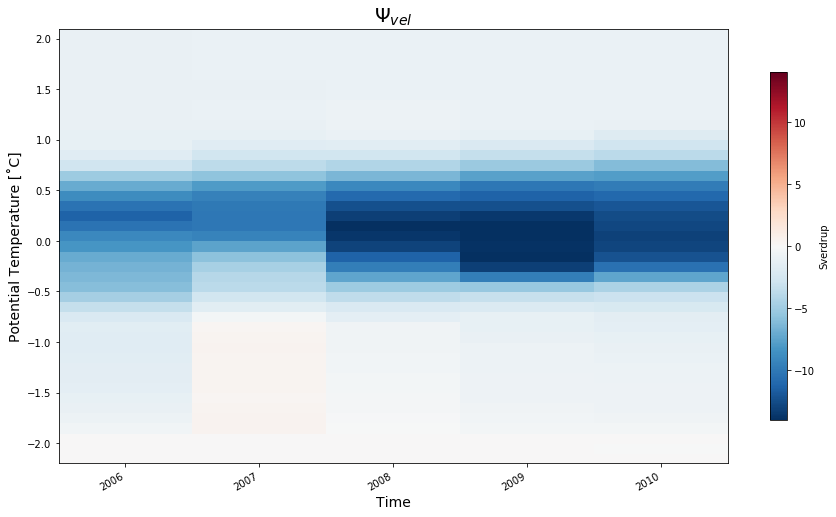

In [168]:
(psi_vel/1e6).resample(time='AS').mean(dim='time').plot(x='time', figsize=(15,8), cbar_kwargs={'shrink': 0.8, 'label':'Sverdrup'})
plt.ylabel('Potential Temperature [˚C]', fontsize=14)
plt.xlabel('Time', fontsize=14)
plt.title('$\Psi_{vel}$', fontsize=20);
#plt.clabel('Sverdrup [$10^{6} \frac{m^3}{s}$] ')

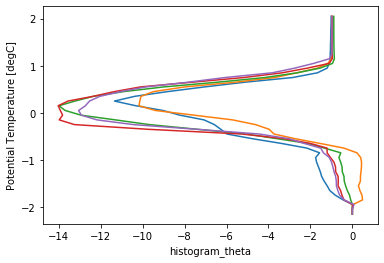

In [169]:
(psi_vel/1e6).resample(time='AS').mean(dim='time').plot.line(y='theta_bin', add_legend=False);

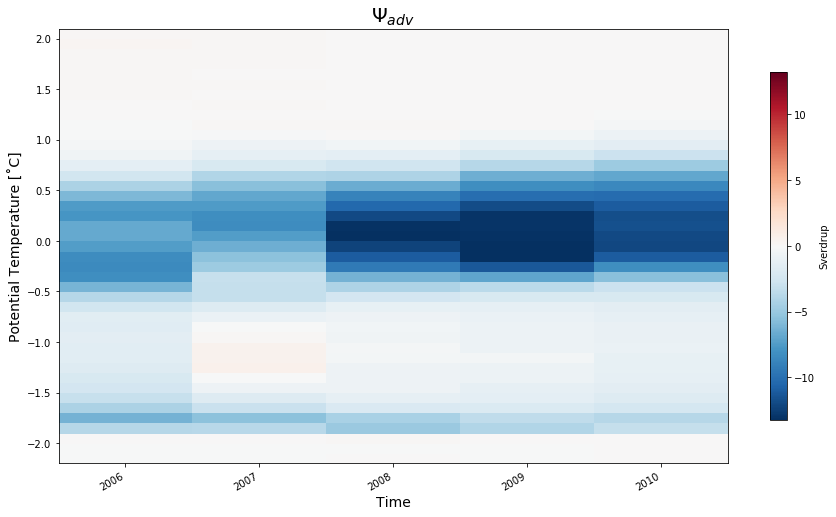

In [113]:
(psi_adv/1e6).resample(time='AS').mean(dim='time').plot(x='time', figsize=(15,8), cbar_kwargs={'shrink': 0.8, 'label':'Sverdrup'})
plt.ylabel('Potential Temperature [˚C]', fontsize=14)
plt.xlabel('Time', fontsize=14)
plt.title('$\Psi_{adv}$', fontsize=20);
#plt.clabel('Sverdrup [$10^{6} \frac{m^3}{s}$] ')

## R2 = $\Psi_{adv} - \Psi_{vel}$ (Numerical Mixing)

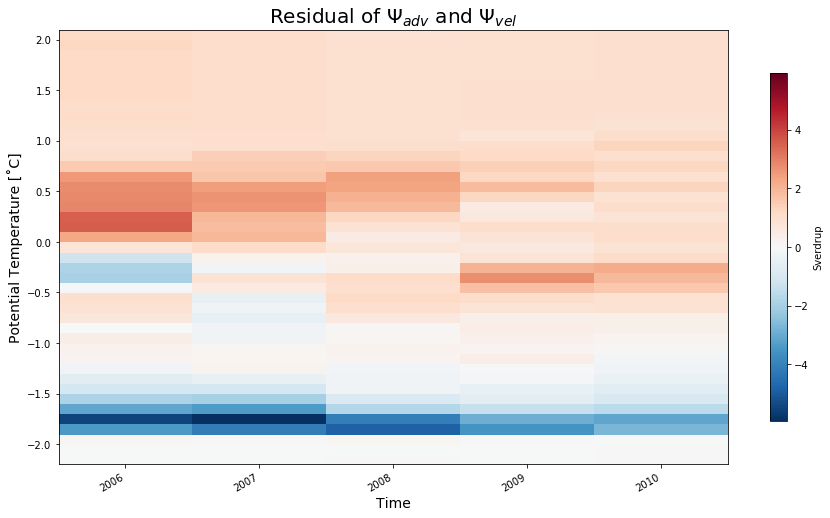

In [170]:
R2 = psi_adv - psi_vel
(R2/1e6).resample(time='AS').mean(dim='time').plot(x='time', figsize=(15,8), cbar_kwargs={'shrink': 0.8, 'label':'Sverdrup'})
plt.ylabel('Potential Temperature [˚C]', fontsize=14)
plt.xlabel('Time', fontsize=14)
plt.title(r'Residual of $\Psi_{adv}$ and $\Psi_{vel}$', fontsize=20);
#plt.clabel('Sverdrup [$10^{6} \frac{m^3}{s}$] ')

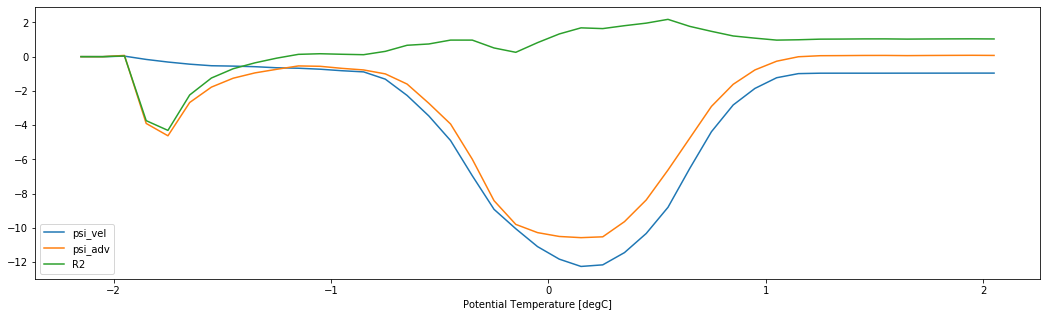

In [171]:
plt.figure(figsize=(18,5))
(psi_vel/1e6).mean(dim='time').plot(label='psi_vel')
(psi_adv/1e6).mean(dim='time').plot(label='psi_adv')
(R2/1e6).mean(dim='time').plot(label='R2')
plt.legend();

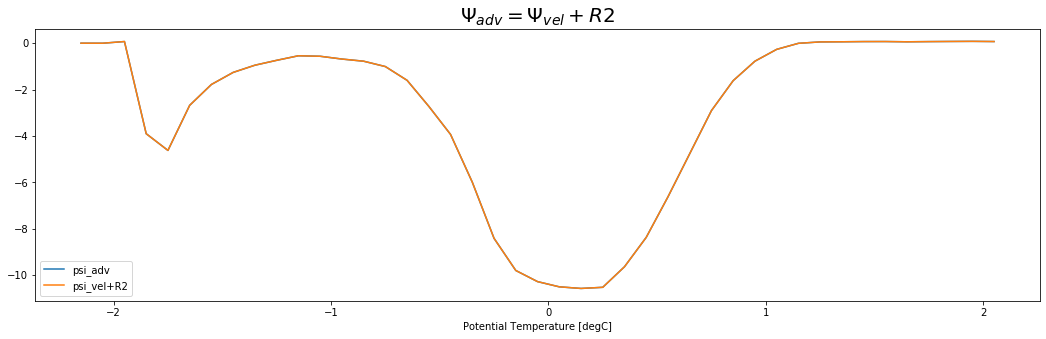

In [172]:
plt.figure(figsize=(18,5))
(psi_adv/1e6).mean(dim='time').plot(label='psi_adv')
((psi_vel+R2)/1e6).mean(dim='time').plot(label='psi_vel+R2')
plt.title(r'$\Psi_{adv} = \Psi_{vel} + R2$', fontsize=20, weight='bold')
plt.legend();

# dV/dt = $\Psi_{adv}$ + $\Omega_{trans-rate}$ + R1

In [173]:
dVdt

<xarray.DataArray 'histogram_theta' (time: 364, theta_bin: 43)>
array([[ 0.00000000e+00, -2.28748148e+04, -3.69975991e+05, ...,
        -6.16349455e+06, -5.95721116e+06, -5.64046126e+06],
       [-1.38401896e+04, -2.18616830e+04, -2.16239214e+05, ...,
        -6.48765725e+06, -6.37624514e+06, -6.20235415e+06],
       [ 1.05688723e+04, -1.57116699e+04, -5.32954301e+05, ...,
        -6.31525228e+06, -5.96302581e+06, -5.61826109e+06],
       ...,
       [ 0.00000000e+00,  9.20998844e+03, -6.13301617e+05, ...,
        -5.85327773e+05, -5.46460535e+05, -5.39943156e+05],
       [ 8.78703230e+03, -7.19582489e+03, -5.86034530e+05, ...,
        -4.34194057e+05, -4.26268623e+05, -3.31422687e+05],
       [ 4.10061511e+03,  1.24256729e+04, -4.98294316e+05, ...,
        -8.19842753e+04, -1.49835167e+05, -2.31711250e+05]])
Coordinates:
  * time       (time) datetime64[ns] 2006-01-06 2006-01-11 ... 2010-12-26
  * theta_bin  (theta_bin) float64 -2.15 -2.05 -1.95 -1.85 ... 1.85 1.95 2.05

In [177]:
omega_trans_rate

<xarray.DataArray (time: 364, theta_bin: 43)>
array([[ 1.59397446e+05,  3.37792128e+05,  1.88992367e+07, ...,
        -1.79329417e+06, -2.08880490e+06, -1.04485857e+06],
       [ 9.93450485e+04,  4.12877951e+05,  2.03692500e+07, ...,
         5.79601508e+04, -4.27769449e+05, -4.60328475e+05],
       [ 1.53966765e+05,  3.10726315e+05,  1.76825881e+07, ...,
         3.05000741e+06,  3.80245333e+06,  2.32810077e+06],
       ...,
       [-0.00000000e+00,  2.17942752e+05,  1.17345103e+07, ...,
         3.62933814e+05,  4.45184971e+05, -1.03283463e+04],
       [ 2.57726817e+04,  2.80475685e+05,  1.08343745e+07, ...,
         4.82303763e+05,  6.98662774e+05,  1.08286679e+06],
       [ 3.63300220e+04,  2.40700201e+05,  9.23686178e+06, ...,
        -2.67108900e+04,  5.12206552e+05,  9.09309167e+05]])
Coordinates:
  * time       (time) datetime64[ns] 2006-01-06 2006-01-11 ... 2010-12-26
  * theta_bin  (theta_bin) float64 -2.15 -2.05 -1.95 -1.85 ... 1.85 1.95 2.05

(2.2, -2.2)

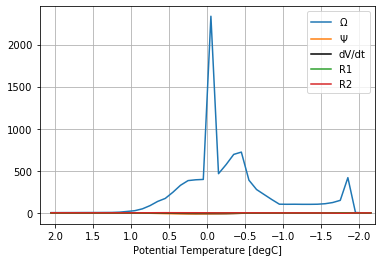

In [181]:
(omega_trans_rate/1e6).mean(dim='time').plot(label=r'$\Omega$')
(psi_vel[1:-1]/1e6).mean(dim='time').plot(label=r'$\Psi$')
(dVdt/1e6).mean(dim='time').plot(label='dV/dt', color='k')
(R1/1e6).mean(dim='time').plot(label='R1')
(R2[1:-1]/1e6).mean(dim='time').plot(label='R2')
plt.legend()
plt.grid()
plt.xlim(2.2, -2.2)

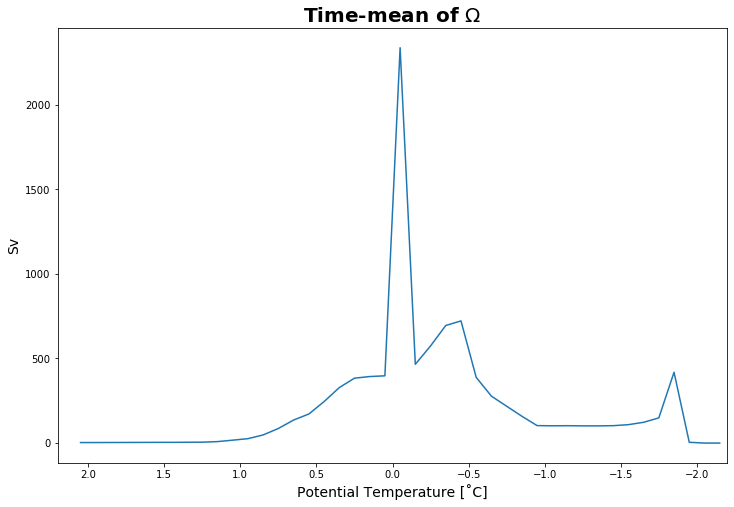

In [182]:
(omega_trans_rate/1e6).mean(dim='time').plot(figsize=(12,8))
plt.xlim(2.2,-2.2)
plt.ylabel('Sv', fontsize=14)
plt.xlabel('Potential Temperature [˚C]', fontsize=14)
plt.title(r'Time-mean of $\Omega$', fontsize=20, weight='bold');

In [187]:
omega_mix = -(all_dsets.OMEGA_conv_horiz_diff_flux_TH + 
              all_dsets.OMEGA_conv_vert_diff_flux_TH)[1:].load()
omega_surf = - (all_dsets.OMEGA_sw_flux_conv_TH + 
                all_dsets.OMEGA_surface_flux_conv_TH +
                all_dsets.OMEGA_lin_fs_correction_TH)[1:].load()

In [188]:
omega_mix

<xarray.DataArray (time: 364, theta_bin: 43)>
array([[ 6.78974140e+03, -2.86791680e+02,  1.60895477e+04, ...,
         1.32259077e+06,  1.80007602e+06,  1.25963450e+06],
       [-1.61153002e+02,  1.31542094e+04, -3.88714581e+04, ...,
        -3.74057460e+05, -2.62570994e+05, -7.81819411e+05],
       [-5.19751979e+03,  4.37745910e+03, -1.28989613e+04, ...,
         1.52499279e+05,  1.93267656e+05,  5.34607903e+05],
       ...,
       [-0.00000000e+00,  3.94410621e+03, -8.06389639e+02, ...,
         6.01094684e+04, -3.91256550e+04,  1.04676450e+05],
       [ 4.83626852e+02,  1.12241830e+03,  7.19487371e+04, ...,
        -1.60730286e+02, -3.34117113e+05, -1.89374709e+05],
       [ 8.16163921e+02, -2.84207308e+01,  3.40096708e+04, ...,
         3.41462546e+04,  1.35968997e+05,  1.33820832e+05]])
Coordinates:
  * time       (time) datetime64[ns] 2006-01-06 2006-01-11 ... 2010-12-26
  * theta_bin  (theta_bin) float64 -2.15 -2.05 -1.95 -1.85 ... 1.85 1.95 2.05

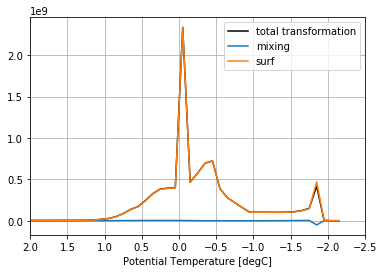

In [189]:
omega_trans_rate.mean(dim='time').plot(label='total transformation', color='k')
omega_mix.mean(dim='time').plot(label='mixing')
omega_surf.mean(dim='time').plot(label='surf')
plt.legend()
plt.grid()
plt.xlim(2, -2.5);

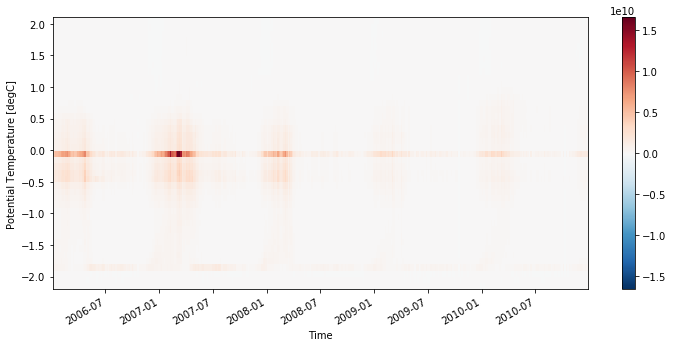

In [190]:
omega_surf.plot(x='time', figsize=(12, 5))

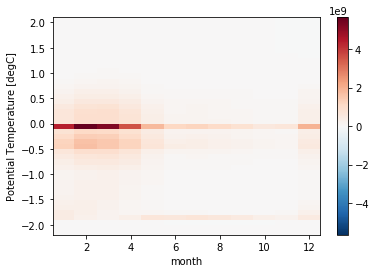

In [191]:
omega_surf.groupby('time.month').mean(dim='time').plot(x='month')

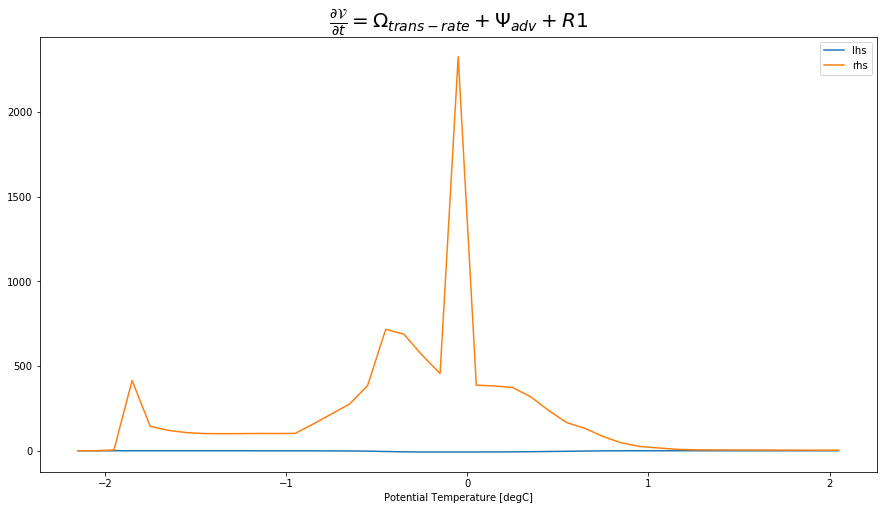

In [192]:
plt.figure(figsize=(15,8))
(dVdt/1e6).mean(dim='time').plot(label='lhs') 
((omega_trans_rate + R1 + psi_adv)/1e6).mean(dim='time').plot(label='rhs')
plt.title(r'$\frac{\partial \mathcal{V}}{\partial t} = \Omega_{trans-rate} + \Psi_{adv} + R1$', fontsize=20, fontweight='bold')
plt.legend();

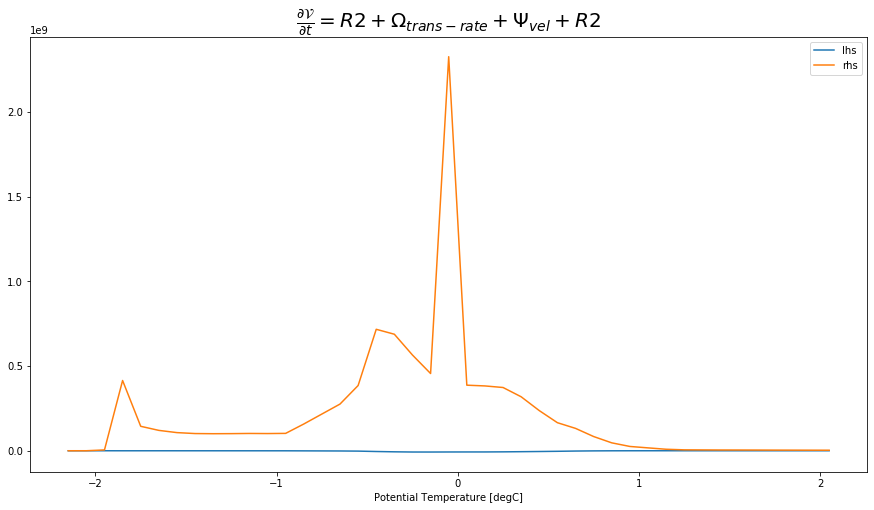

In [193]:
plt.figure(figsize=(15,8))
dVdt.mean(dim='time').plot(label='lhs') 
(omega_trans_rate + R1 + psi_vel + R2).mean(dim='time').plot(label='rhs')
plt.title(r'$\frac{\partial \mathcal{V}}{\partial t} = R2 + \Omega_{trans-rate} + \Psi_{vel} + R2$', fontsize=20, fontweight='bold')
plt.legend();

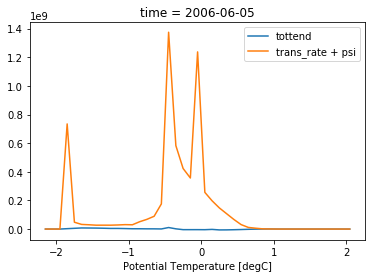

In [196]:
n = 30
omega_total.isel(time=n).plot(label='tottend')
(omega_trans_rate + psi_adv).isel(time=n).plot(label='trans_rate + psi')
plt.legend();